In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

db=pd.read_csv("Loan_default.csv")

print(db.head())

       LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time    

In [35]:
#Cleaning data

def cleaning(db):
    
    db=db.drop(columns=["LoanID"])

    def convertinginbinary(x):
        if x=="Yes":
            return 1
        elif x=="No":
            return 0
        else:
            return x
    db[["HasMortgage","HasDependents","HasCoSigner"]]=db[["HasMortgage","HasDependents","HasCoSigner"]].applymap(convertinginbinary)

    def convertinginfloat(x):
        try:
            x=x.astype(float)
            return x
        except:
            return x
    db=db.apply(convertinginfloat)
    return db

db=cleaning(db)
print(db.head())
print(db.dtypes)

    Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  56.0  85994.0     50587.0        520.0            80.0             4.0   
1  69.0  50432.0    124440.0        458.0            15.0             1.0   
2  46.0  84208.0    129188.0        451.0            26.0             3.0   
3  32.0  31713.0     44799.0        743.0             0.0             3.0   
4  60.0  20437.0      9139.0        633.0             8.0             4.0   

   InterestRate  LoanTerm  DTIRatio    Education EmploymentType MaritalStatus  \
0         15.23      36.0      0.44   Bachelor's      Full-time      Divorced   
1          4.81      60.0      0.68     Master's      Full-time       Married   
2         21.17      24.0      0.31     Master's     Unemployed      Divorced   
3          7.07      24.0      0.23  High School      Full-time       Married   
4          6.51      48.0      0.73   Bachelor's     Unemployed      Divorced   

   HasMortgage  HasDependents LoanPurpose  HasCoSi

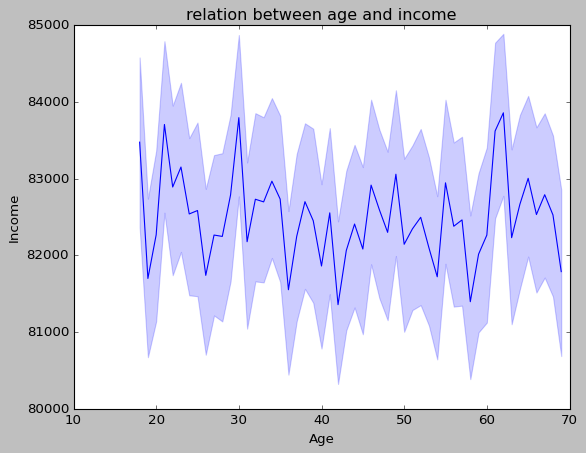

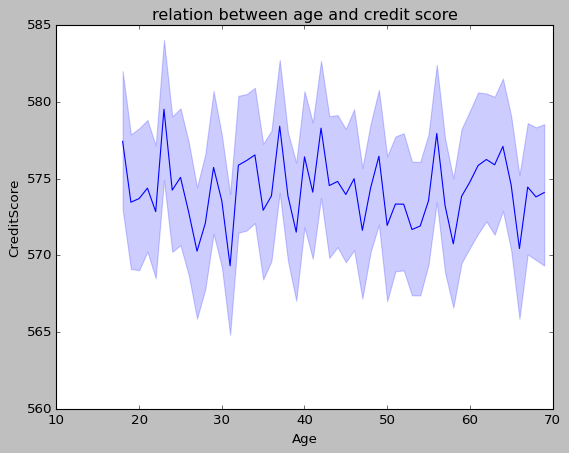

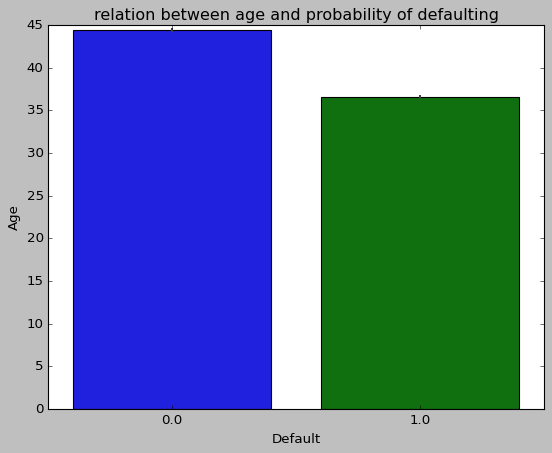

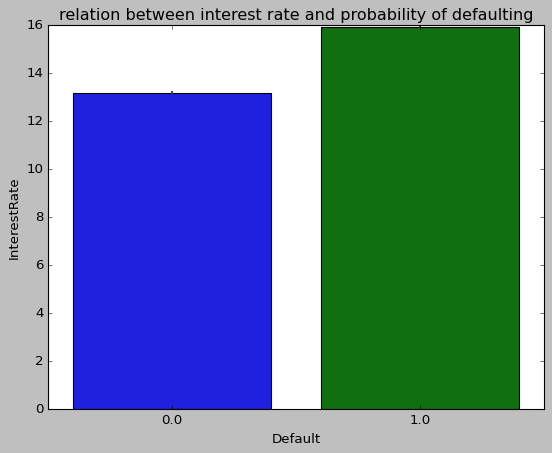

In [36]:
# Studying some relations connected with age
def showingage(db):
    plt.style.use("classic")
    sns.lineplot(data=db, x="Age",y="Income")
    plt.title("relation between age and income")
    plt.show()
    sns.lineplot(data=db, x="Age",y="CreditScore")
    plt.title("relation between age and credit score")
    plt.show()
    sns.barplot(data=db, x="Default",y="Age")
    plt.title("relation between age and probability of defaulting")
    plt.show()
    sns.barplot(data=db, x="Default",y="InterestRate")
    plt.title("relation between interest rate and probability of defaulting")
    plt.show()
showingage(db)

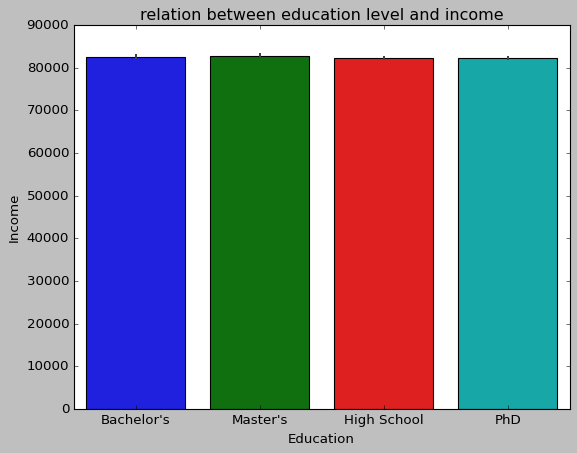

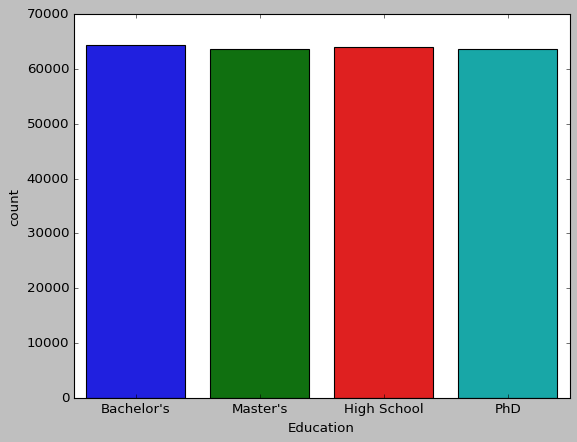

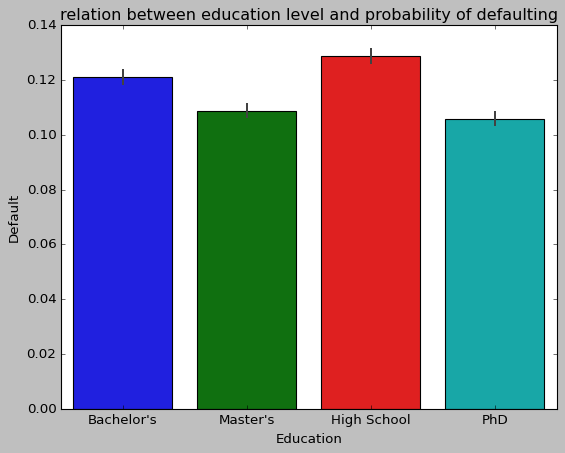

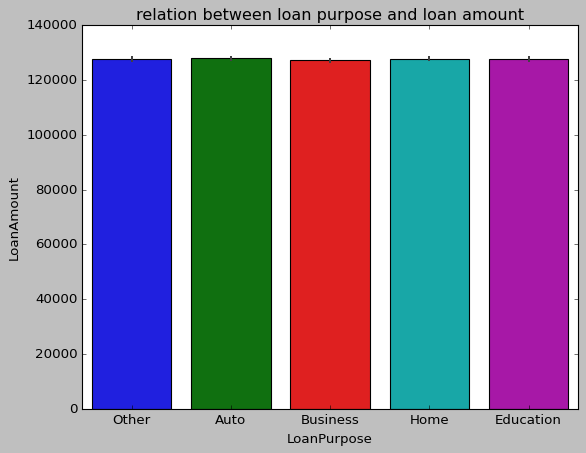

In [37]:
# Studying some correlations connected with education level

def showingage(db):
    plt.style.use("classic")
    sns.barplot(data=db, x="Education",y="Income")
    plt.title("relation between education level and income")
    plt.show()
    sns.countplot(data=db, x="Education")
    plt.show()
    sns.barplot(data=db, x="Education",y="Default")
    plt.title("relation between education level and probability of defaulting")
    plt.show()
    sns.barplot(data=db, x="LoanPurpose",y="LoanAmount")
    plt.title("relation between loan purpose and loan amount")
    plt.show()
showingage(db)



In [38]:
# Studying some data distribuition

db1=db[["Education","EmploymentType"]].groupby(["Education","EmploymentType"]).value_counts()
print(db1)
print(db.shape)



Education    EmploymentType
Bachelor's   Full-time         15939
             Part-time         16363
             Self-employed     15944
             Unemployed        16120
High School  Full-time         15993
             Part-time         15929
             Self-employed     15991
             Unemployed        15990
Master's     Full-time         15978
             Part-time         15867
             Self-employed     15921
             Unemployed        15775
PhD          Full-time         15746
             Part-time         16002
             Self-employed     15850
             Unemployed        15939
Name: count, dtype: int64
(255347, 17)


In [39]:
# studying variables to convert in numbers

print(db["LoanPurpose"].value_counts())
print(db["Education"].value_counts())
print(db["EmploymentType"].value_counts())
print(db["MaritalStatus"].value_counts())


LoanPurpose
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: count, dtype: int64
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64
MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64


In [64]:
# Transforming all variables to numeric

from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,LabelEncoder
db1=db.copy()
def tonumeric(db1):


    def convertingeducation(x):
        if x=="High School":
            return 1
        elif x=="Bachelor's":
            return 2
        elif x=="Master's":
            return 3
        elif x=="PhD":
            return 4
        
    db1["Education"]=db1["Education"].apply(convertingeducation)
    scalloanpurpose=LabelEncoder()
    db1["LoanPurpose"]=scalloanpurpose.fit_transform(db1[["LoanPurpose"]])
    scalemployment=OneHotEncoder(sparse_output=False)
    db1["Fulltime"],db1["Part-time"],db1["Self-employed"],db1["unemplyed"]=scalemployment.fit_transform(db1[["EmploymentType"]]).T
    scalmaritalstatus=OneHotEncoder(sparse_output=False)
    db1["Divorced"],db1["Married"],db1["Single"]=scalmaritalstatus.fit_transform(db1[["MaritalStatus"]]).T
    db1=db1.drop(columns=["MaritalStatus","EmploymentType"])
    db1=db1.astype(float)
    return db1
db1=tonumeric(db1)

print(db1.head())



c:\Users\stefa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    Age   Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0  56.0  85994.0     50587.0        520.0            80.0             4.0   
1  69.0  50432.0    124440.0        458.0            15.0             1.0   
2  46.0  84208.0    129188.0        451.0            26.0             3.0   
3  32.0  31713.0     44799.0        743.0             0.0             3.0   
4  60.0  20437.0      9139.0        633.0             8.0             4.0   

   InterestRate  LoanTerm  DTIRatio  Education  ...  LoanPurpose  HasCoSigner  \
0         15.23      36.0      0.44        2.0  ...          4.0          1.0   
1          4.81      60.0      0.68        3.0  ...          4.0          1.0   
2         21.17      24.0      0.31        3.0  ...          0.0          0.0   
3          7.07      24.0      0.23        1.0  ...          1.0          0.0   
4          6.51      48.0      0.73        2.0  ...          0.0          0.0   

   Default  Fulltime  Part-time  Self-employed  un